# Name : Samer AlTaki
### IOT & Computer Vision 
## Task2 :
### 1.1 Color Identification in Image

#   

# 1.1 Color Identification in Image

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans
from collections import Counter


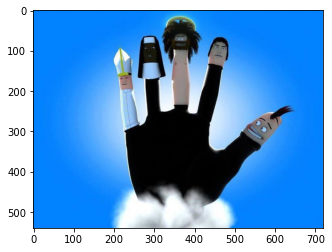

In [10]:
img = cv2.imread('image1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [11]:
def RGB_to_HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [12]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB_to_HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([  6.46878425, 131.76346168, 254.28759955]),
 array([4.67704726, 4.80663068, 5.42345692]),
 array([229.18639034, 241.37522276, 248.28004752]),
 array([133.93042607, 132.32451128, 132.58065163]),
 array([102.08657641, 177.42201445, 250.06945541]),
 array([ 47.93125713, 151.51316353, 251.61522546]),
 array([60.44002665, 69.80519769, 79.32341182]),
 array([164.7451611 , 203.675633  , 239.94450617])]

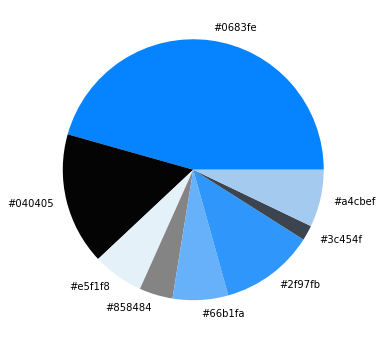

In [13]:
get_colors(get_image('image1.jpg'), 8, True)
